Copyright (c) 2017,2018, Johannes Schöneberg. All rights reserved.
The default copyright laws apply.

In [5]:
import csv


#http://soft-matter.github.io/trackpy/v0.3.2/tutorial/walkthrough.html


from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

import matplotlib as mpl
import matplotlib.pyplot as plt

# change the following to %matplotlib notebook for interactive plotting
%matplotlib inline

# Optionally, tweak styles.
#mpl.rc('figure',  figsize=(10, 6))
#mpl.rc('image', cmap='gray')

import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience

import pims

import scipy


import math



import scipy.ndimage

#own modules / functions
import sys
pythonPackagePath = "/Users/johannesschoeneberg/git/JohSchoeneberg/Confleezers/confleezers_data_analysis/"
sys.path.append(pythonPackagePath+"/modules")
import InputProcessing as inproc
import ForceFileProcessing as ffp
import TubeProcessing as tubeProc


#### plot definitions
#https://stackoverflow.com/questions/22408237/named-colors-in-matplotlib
#c_ch1 = 'aqua'
#c_ch1 = 'deepskyblue'
#c_ch1 = 'cyan'

#c_ch2 = 'springgreen'
#c_ch2 = 'lime'
#c_ch3 = 'red'
#lwidth = 3

#xlimit = (-150,300)

In [6]:
# read input parameters:
path = '/Volumes/Samsung_T3b/science/confleezers/2018-06-05/v7_analysis2/'
maxEveryLineFolder = 'tube__maxIntAlongTube'


inputParameters = pd.read_csv(path+'_info.csv',names=['key','value'])

outputDataFolder = inproc.getInputParameter(inputParameters,"output_data_folder")


import os
if not os.path.exists(path+outputDataFolder+'/'+maxEveryLineFolder+'/'):
    os.makedirs(path+outputDataFolder+'/'+maxEveryLineFolder+'/')

inputParameters[1:5]

,key,value
1,output_data_folder,./
2,vesicleID_of_that_day,MANUAL eg: v7
3,date,MANUAL eg: 2018-07-13
4,movie_originalFilename,v7_OH_MY_GOOOOODDDD!!!! Movie 001.nd2


In [7]:
# read the tube vector from a previous step

inputDataFolder = inproc.getInputParameter(inputParameters,"input_data_folder")
tubeVectorFileName = inproc.getInputParameter(inputParameters,"tube_vector_file")

#path = '/Volumes/Samsung_T3b/science/confleezers/2018-06-05/v10all/'

df_tubeVector = pd.read_csv(path+inputDataFolder+'/'+tubeVectorFileName)
df_tubeVector.columns=['frame','tubeLenght',"vesicle_attachment_x",'vesicle_attachment_y','bead_attachment_x','bead_attachment_y']
df_tubeVector[0:5]



,frame,tubeLenght,vesicle_attachment_x,vesicle_attachment_y,bead_attachment_x,bead_attachment_y
0,0,70.064256,143.0,75.0,73.0,72.0
1,1,71.028163,144.0,74.0,73.0,72.0
2,2,70.028566,143.0,74.0,73.0,72.0
3,3,71.028163,144.0,74.0,73.0,72.0
4,4,70.064256,143.0,75.0,73.0,72.0


# calculate tube intensity for channel 0

(-100, 500)

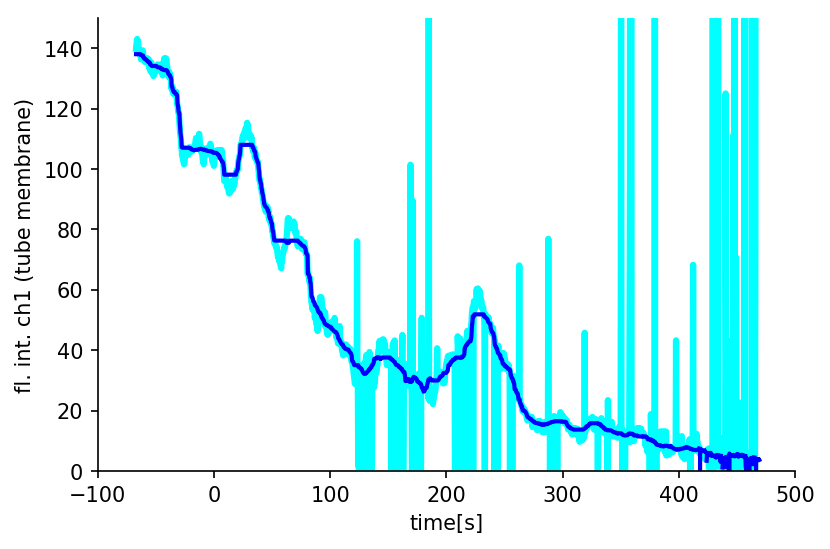

In [19]:

movie_zoomVesicle_ch0 = 'movie_ch0_avg20_bleachCorrected.tif'
filenamePath_gaussFit_ch0 = path+outputDataFolder+movie_zoomVesicle_ch0+'__gaussFitAlongTube.csv'
df_fit_ch0 = pd.read_csv(filenamePath_gaussFit_ch0)

plt.figure(dpi=150)
#plt.gca().set_aspect(1.7)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)


deltaT = int(float(inproc.getInputParameter(inputParameters,"movie_startTime_difference_UVstart_seconds")))
frameRate = float(inproc.getInputParameter(inputParameters,"time_between_frames_seconds"))
time = deltaT + np.arange(0,len(df_fit_ch0))*frameRate


plt.plot(time,df_fit_ch0['maxx-background_median'],color='cyan',lw=3)
plt.plot(time,scipy.ndimage.median_filter(df_fit_ch0['maxx-background_median'],60),lw=2,c='blue');
plt.xlabel('time[s]')
plt.ylabel('fl. int. ch1 (tube membrane)')
plt.ylim(0,150)
plt.xlim(-100,500)





# channel 1

(-100, 500)

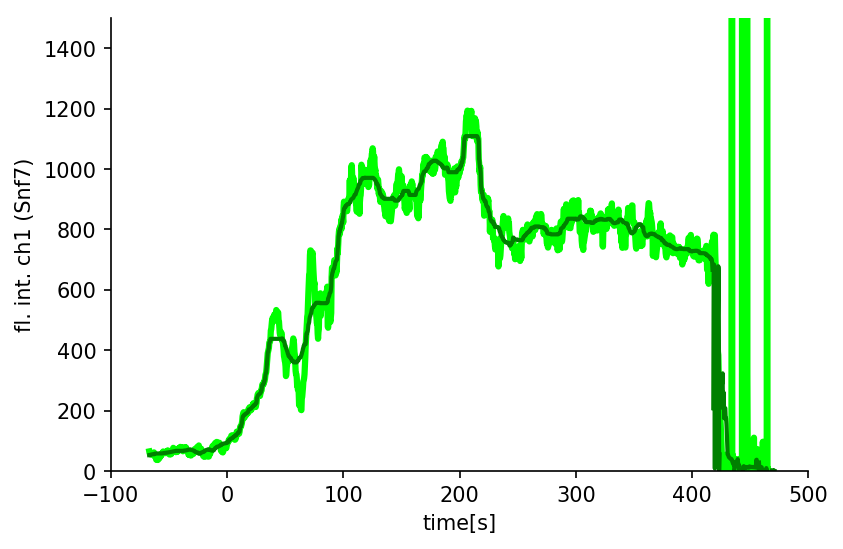

In [20]:
movie_zoomVesicle_ch1 = 'movie_ch1_avg20_bleachCorrected.tif'
filenamePath_gaussFit_ch1 = path+outputDataFolder+movie_zoomVesicle_ch1+'__gaussFitAlongTube.csv'
df_fit_ch1 = pd.read_csv(filenamePath_gaussFit_ch1)


plt.figure(dpi=150)
#plt.gca().set_aspect(0.7)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

deltaT = int(float(inproc.getInputParameter(inputParameters,"movie_startTime_difference_UVstart_seconds")))
frameRate = float(inproc.getInputParameter(inputParameters,"time_between_frames_seconds"))
time = deltaT + np.arange(0,len(df_fit_ch1))*frameRate

df_fit_ch1 = pd.read_csv(filenamePath_gaussFit_ch1)
plt.plot(time,df_fit_ch1['maxx-background_median'],color='lime',lw=3)
plt.plot(time,scipy.ndimage.median_filter(df_fit_ch1['maxx-background_median'],60),lw=2,c='green');
plt.xlabel('time[s]')
plt.ylabel('fl. int. ch1 (Snf7)')
plt.ylim(0,1500)
plt.xlim(-100,500)



# ch2 analysis 

(-100, 500)

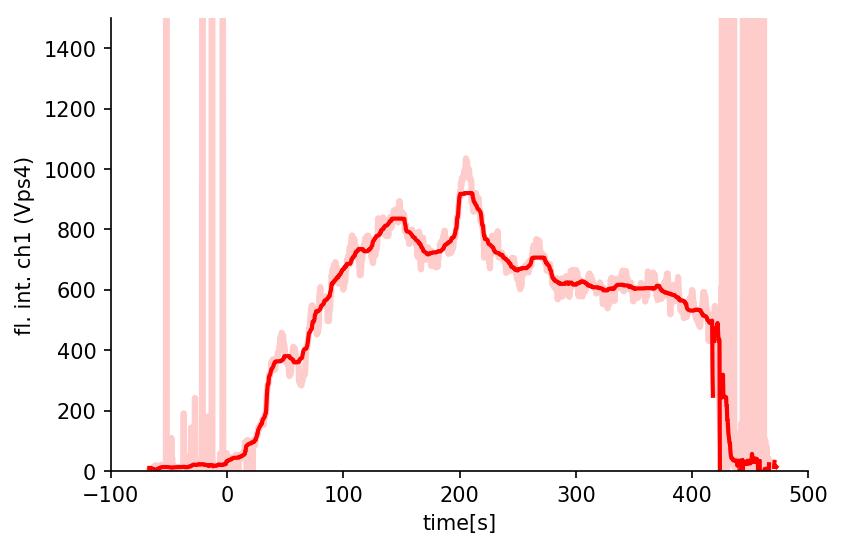

In [21]:
movie_zoomVesicle_ch2 = "movie_ch2_avg20_bleachCorrected.tif"
filenamePath_gaussFit_ch2 = path+outputDataFolder+movie_zoomVesicle_ch2+'__gaussFitAlongTube.csv'
df_fit_ch2 = pd.read_csv(filenamePath_gaussFit_ch2)

plt.figure(dpi=150)
#plt.gca().set_aspect(0.8)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

deltaT = int(float(inproc.getInputParameter(inputParameters,"movie_startTime_difference_UVstart_seconds")))
frameRate = float(inproc.getInputParameter(inputParameters,"time_between_frames_seconds"))
time = deltaT + np.arange(0,len(df_fit_ch2))*frameRate


plt.plot(time,df_fit_ch2['maxx-background_median'],color='red',alpha=0.2,lw=3)
plt.plot(time,scipy.ndimage.median_filter(df_fit_ch2['maxx-background_median'],60),lw=2,c='red');
plt.xlabel('time[s]')
plt.ylabel('fl. int. ch1 (Vps4)')
plt.ylim(0,1500)
plt.xlim(-100,500)



In [ ]:
#plot all together


(-90, 470)

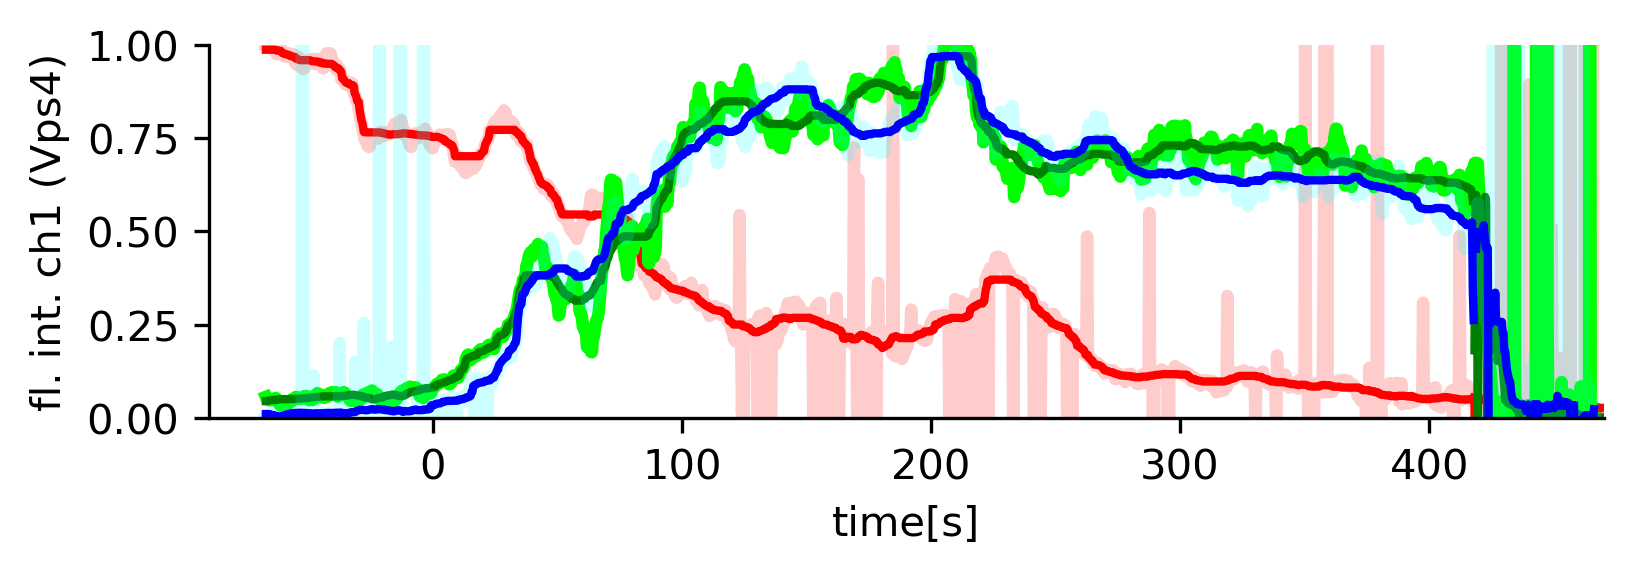

In [59]:
ch0color = ['red','red']
ch1color = ['green','lime']
ch2color = ['blue','cyan']

movie_zoomVesicle_ch0 = 'movie_ch0_avg20_bleachCorrected.tif'
filenamePath_gaussFit_ch0 = path+outputDataFolder+movie_zoomVesicle_ch0+'__gaussFitAlongTube.csv'
df_fit_ch0 = pd.read_csv(filenamePath_gaussFit_ch0)

plt.figure(dpi=300)
plt.gca().set_aspect(150)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)


deltaT = int(float(inproc.getInputParameter(inputParameters,"movie_startTime_difference_UVstart_seconds")))
frameRate = float(inproc.getInputParameter(inputParameters,"time_between_frames_seconds"))
time = deltaT + np.arange(0,len(df_fit_ch0))*frameRate


ch0norm = 140
ch0plot = df_fit_ch0['maxx-background_median']
ch0plot_medianFiltered = scipy.ndimage.median_filter(df_fit_ch0['maxx-background_median'],60)
plt.plot(time,ch0plot/ch0norm,color=ch0color[1],alpha=0.2,lw=3)
plt.plot(time,ch0plot_medianFiltered/ch0norm,lw=2,c=ch0color[0]);
plt.xlabel('time[s]')
plt.ylabel('fl. int. ch1 (tube membrane)')
plt.ylim(0,150)
plt.xlim(-100,500)



#------

movie_zoomVesicle_ch1 = 'movie_ch1_avg20_bleachCorrected.tif'
filenamePath_gaussFit_ch1 = path+outputDataFolder+movie_zoomVesicle_ch1+'__gaussFitAlongTube.csv'
df_fit_ch1 = pd.read_csv(filenamePath_gaussFit_ch1)



#plt.gca().set_aspect(0.7)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

deltaT = int(float(inproc.getInputParameter(inputParameters,"movie_startTime_difference_UVstart_seconds")))
frameRate = float(inproc.getInputParameter(inputParameters,"time_between_frames_seconds"))
time = deltaT + np.arange(0,len(df_fit_ch1))*frameRate

ch1plot = df_fit_ch1['maxx-background_median']
ch1plot_medianFiltered = scipy.ndimage.median_filter(df_fit_ch1['maxx-background_median'],60)
ch1norm = 1145
plt.plot(time,ch1plot/ch1norm,color=ch1color[1],lw=3)
plt.plot(time,ch1plot_medianFiltered/ch1norm,lw=2,c=ch1color[0]);
plt.xlabel('time[s]')
plt.ylabel('fl. int. ch1 (Snf7)')
plt.ylim(0,1500)
plt.xlim(-100,500)


#-------


movie_zoomVesicle_ch2 = "movie_ch2_avg20_bleachCorrected.tif"
filenamePath_gaussFit_ch2 = path+outputDataFolder+movie_zoomVesicle_ch2+'__gaussFitAlongTube.csv'
df_fit_ch2 = pd.read_csv(filenamePath_gaussFit_ch2)


#plt.gca().set_aspect(0.8)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

deltaT = int(float(inproc.getInputParameter(inputParameters,"movie_startTime_difference_UVstart_seconds")))
frameRate = float(inproc.getInputParameter(inputParameters,"time_between_frames_seconds"))
time = deltaT + np.arange(0,len(df_fit_ch2))*frameRate


ch2plot = df_fit_ch2['maxx-background_median']
ch2plot_medianFiltered = scipy.ndimage.median_filter(df_fit_ch2['maxx-background_median'],60)
ch2norm = 950

plt.plot(time,ch2plot/ch2norm,color=ch2color[1],alpha=0.2,lw=3)

plt.plot(time,ch2plot_medianFiltered/ch2norm,lw=2,c=ch2color[0]);
plt.xlabel('time[s]')
plt.ylabel('fl. int. ch1 (Vps4)')
plt.ylim(0,1)
plt.xlim(-90,470)




